In [1]:
from fastai.vision.all  import *
from pathlib import Path
import pandas as pd
path = 'kickoffs/v1'
p = Path(path);p.ls()

(#2923) [Path('kickoffs/v1/.ipynb_checkpoints'),Path('kickoffs/v1/2018090600_1606.png'),Path('kickoffs/v1/2018090600_677.png'),Path('kickoffs/v1/2018090900_1992.png'),Path('kickoffs/v1/2018090900_2416.png'),Path('kickoffs/v1/2018090900_2777.png'),Path('kickoffs/v1/2018090900_36.png'),Path('kickoffs/v1/2018090900_400.png'),Path('kickoffs/v1/2018090900_4236.png'),Path('kickoffs/v1/2018090901_2022.png')...]

In [2]:
plays = pd.read_csv('plays.csv'); plays.head(2)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,"J.Elliott kicks 65 yards from PHI 35 to end zone, Touchback.",1,0,0,PHI,Kickoff,Touchback,44966.0,...,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Center-R.Lovato. J.Hardy to ATL 41 for 5 yards (K.Grugier-Hill). PENALTY on PHI-S.Gibson, Unsportsmanlike Conduct, 15 yards, enforced at ATL 41.",1,4,4,PHI,Punt,Return,45603.0,...,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18


In [3]:
df = plays.query('specialTeamsPlayType == "Kickoff" & specialTeamsResult == "Return"')[['gameId', 'playId', 'playResult']]
df['fname'] = df.apply(lambda row: str(row.gameId) + '_' + str(row.playId) + '.png', axis=1)
df['label'] = df.apply(lambda row: 1 if int(row.playResult) < 40 else 0 , axis=1)
df.head()

,gameId,playId,playResult,fname,label
3,2018090600,677,34,2018090600_677.png,1
9,2018090600,1606,60,2018090600_1606.png,0
24,2018090900,36,45,2018090900_36.png,0
26,2018090900,400,33,2018090900_400.png,1
39,2018090900,1992,40,2018090900_1992.png,0


In [8]:
df2 = df[['fname', 'label']]
dls = ImageDataLoaders.from_df(df=df2, path=p, bs=32)

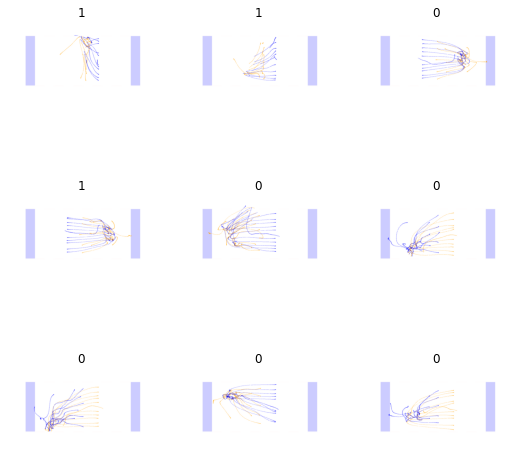

In [11]:
dls.show_batch()

In [12]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0020892962347716093)

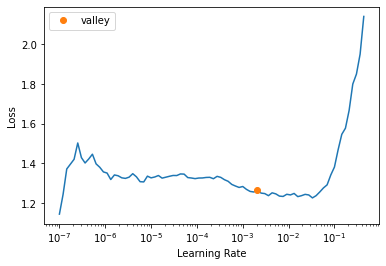

In [13]:
learn.lr_find()

In [14]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.035778,0.806847,0.364726,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.763470,0.982773,0.342466,01:01
1,0.478758,0.472226,0.203767,01:00


In [16]:
import cv2
im = cv2.imread('kickoffs/v1/2018090900_1992.png')
print('width: ', im.shape[1])
print('height:', im.shape[0])

width:  864
height: 455


In [24]:
dls2 = ImageDataLoaders.from_df(df=df2, path=p, bs=32, item_tfms=Resize(224))

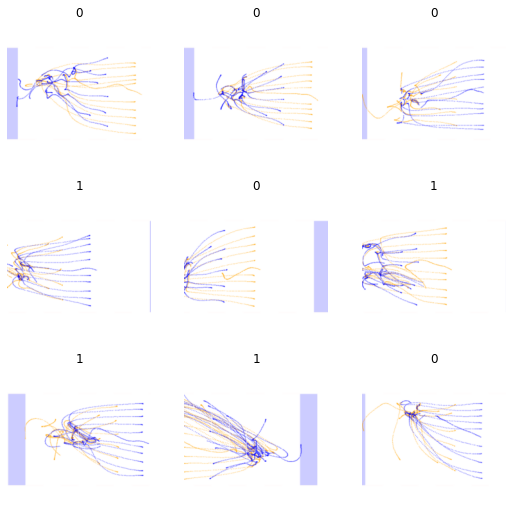

In [25]:
dls2.show_batch()

In [26]:
learn = cnn_learner(dls2, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0010000000474974513)

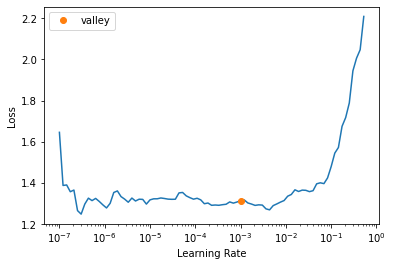

In [27]:
learn.lr_find()

In [28]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.143009,0.750299,0.333904,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.857869,0.795356,0.344178,00:14
1,0.652079,0.501319,0.268836,00:14


In [29]:
learn.fine_tune(10, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.528841,0.528994,0.236301,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.525784,0.456380,0.212329,00:14
1,0.496899,0.604096,0.270548,00:14
2,0.464749,0.583186,0.246575,00:14
3,0.441621,0.437419,0.207192,00:14
4,0.390513,0.547417,0.217466,00:14
5,0.321169,0.477882,0.190068,00:14
6,0.237549,0.540092,0.193493,00:15
7,0.216251,0.552057,0.208904,00:14
8,0.154243,0.556166,0.183219,00:14
9,0.134464,0.572642,0.184932,00:14
